In [1]:
import os
import pickle

import numpy as np
import pandas as pd
import arviz as az
import xarray as xr

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import pystan
%load_ext jupyterstan

PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
STAN_MODEL_PATH = os.path.join(PROJECT_ROOT_DIR, "stan_models")
STAN_DATA_PATH = os.path.join(PROJECT_ROOT_DIR,'data')

## 几个有用的函数
- save_fig:用于保存仿真的图片到文件

- StanModel_cache: 保存编译好的Stan模型

- StanModel_load: 载入保存的Stan模型

In [2]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    

# 将编译好的模型，存储成pickle，供直接使用
def StanData_cache(var, data_name, **kwargs):
    path = os.path.join(STAN_DATA_PATH, data_name + '.pkl')
    with open(path,'wb') as f:
        pickle.dump(var, f)
    print("DATA cached as:" + data_name +'.pkl')
    
    
def StanData_load(data_name):
    path = os.path.join(STAN_DATA_PATH, data_name + '.pkl')
    try:
        sm = pickle.load(open(path, 'rb'))
    except:
        raise FileNotFoundError
    else:
        print("Using cached StanDATA: " + data_name)
    return sm

# 将编译好的模型，存储成pickle，供直接使用
def StanModel_cache(compiled_model, model_name, **kwargs):
    path = os.path.join(STAN_MODEL_PATH, model_name + '.pkl')
    with open(path,'wb') as f:
        pickle.dump(compiled_model, f)
    print("Model cached as:" + model_name +'.pkl')
    
    
def StanModel_load(model_name):
    path = os.path.join(STAN_MODEL_PATH, model_name + '.pkl')
    try:
        sm = pickle.load(open(path, 'rb'))
    except:
        raise FileNotFoundError
    else:
        print("Using cached StanModel:" + model_name)
    return sm

## stan模型fit

### 实验1：均匀分布的感知节点100个，20组数据，带测量误差的模型拟合

In [3]:
# 数据读取
stan_data = StanData_load('100_regular_points')

# 模型读取
stan_model = StanModel_load('exponential_cov_measure_error')

Using cached StanDATA: 100_regular_points
Using cached StanModel:exponential_cov_measure_error


In [4]:
fit = stan_model.sampling(stan_data, iter=10000, chains=1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa417355750>,
      dtype=object)

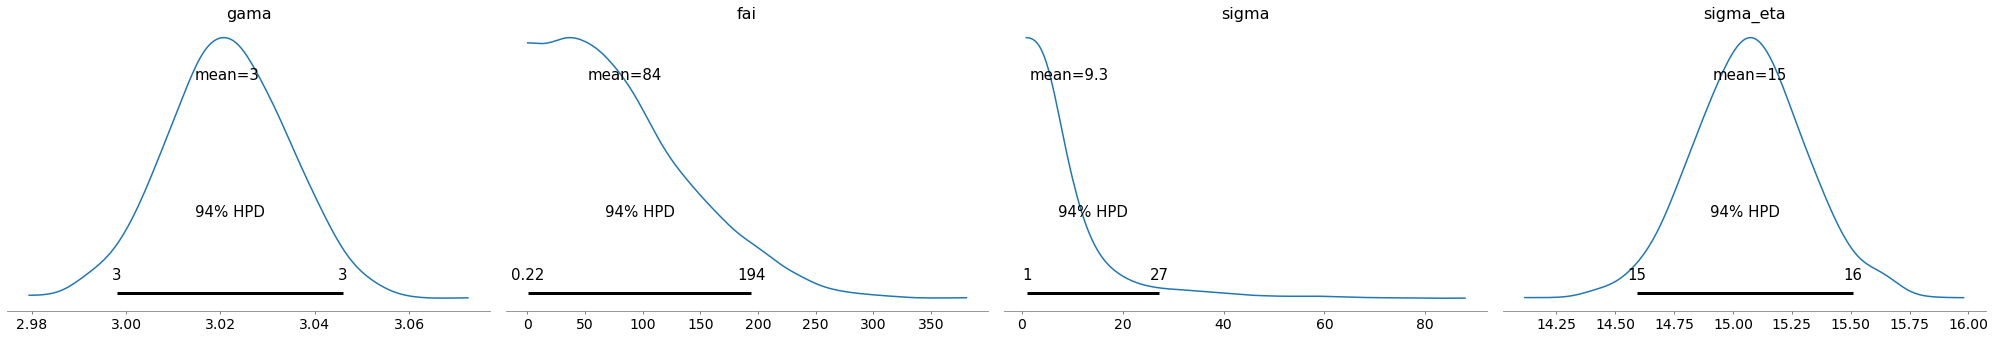

In [5]:
az.plot_posterior(fit)

### 实验2：均匀分布的感知节点100个，20组数据，不带测量误差的模型拟合

In [8]:
# 数据读取
stan_data = StanData_load('100_regular_points')

# 模型读取
stan_model = StanModel_load('exponential_cov_no_error')

Using cached StanDATA: 100_regular_points
Using cached StanModel:exponential_cov_no_error


In [9]:
fit2 = stan_model.sampling(stan_data, iter=10000, chains=1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa438ad67d0>,
      dtype=object)

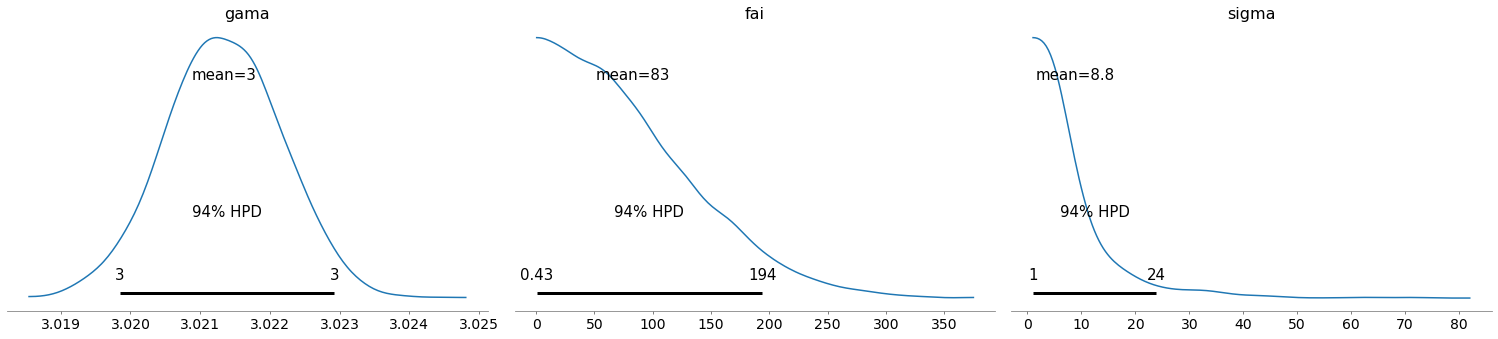

In [10]:
az.plot_posterior(fit2)

### 实验3：均匀分布的感知节点100个，100组数据，带测量误差的模型拟合

In [11]:
# 数据读取
stan_data_3 = StanData_load('100_groups_100reluar_points')

# 模型读取
stan_model_3 = StanModel_load('exponential_cov_measure_error')

Using cached StanDATA: 100_groups_100reluar_points
Using cached StanModel:exponential_cov_measure_error


In [12]:
fit3 = stan_model_3.sampling(stan_data_3, iter=10000, chains=1)

/opt/conda/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/opt/conda/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/opt/conda/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/opt/conda/lib/python3.7/site-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa403b70210>,
      dtype=object)

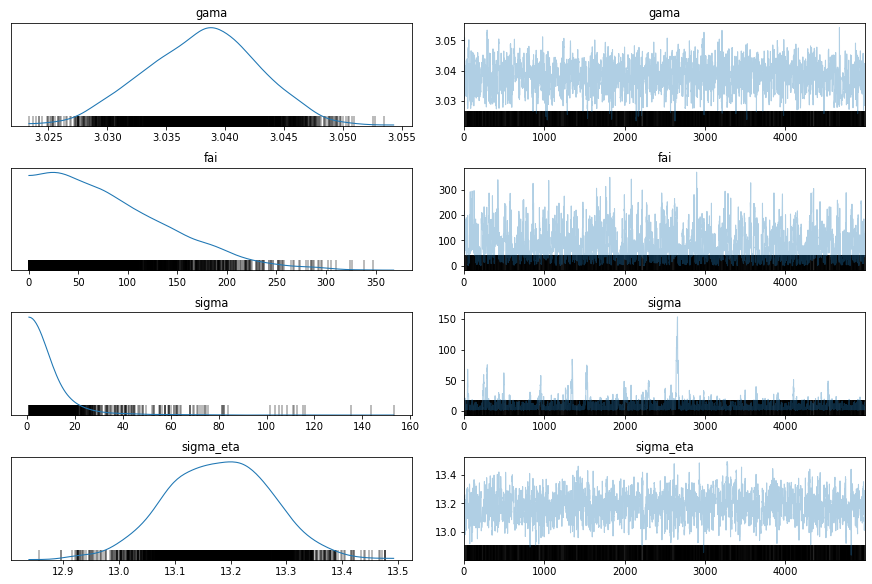

In [13]:
az.plot_trace(fit3)